In [1]:
from sklearn.metrics import recall_score, roc_curve
import numpy as np

In [4]:
def calc_ams(pred,gt, weights):
    #TODO: use original weights and scale by (fraction of total events of used)

    pred = convert_bool_or_conf_to_int(pred)
    br = 10
    #weighted true positives
    s = sum([weights[i] if gt[i]==1. and pred[i]==1. else 0. for i in range(gt.shape[0])])

    #weighted false postivies
    b = sum([weights[i] if gt[i]==0. and pred[i]==1. else 0. for i in range(gt.shape[0])])
    ams = np.sqrt(2 * ((s+b+br)*np.log(1 + (s / (b+br))) - s))
    return dict(ams=ams)

def bg_rej_sig_eff(pred, gt, weights=None, thresh=0.5):
    
    if weights is not None:
        weights = weights.squeeze()
    sig_pred = convert_bool_or_conf_to_int(pred, thresh=thresh)
    
    weighted_sig_eff = recall_score(gt,sig_pred, sample_weight=weights)

    bg_pred = convert_bool_or_conf_to_int(pred, reverse=True, thresh=thresh)
    gt_bg = convert_bool_or_conf_to_int(gt, reverse=True, thresh=thresh)
    
    weighted_bg_rej = recall_score(gt_bg,bg_pred, sample_weight=weights)
    
    return dict(sig_eff=weighted_sig_eff, bg_rej=weighted_bg_rej)



def sig_eff_at(bg_rej, pred,gt,weights=None, name=None):
    roc = roc_vals(pred,gt,weights)
    des_fpr = 1 - bg_rej
    ind = np.searchsorted(roc["fpr"], des_fpr)
    sig_eff = roc["tpr"][ind]
    bg_rej_string = str(bg_rej) if name is None else name
    return {"sig_eff_at_" + bg_rej_string:sig_eff}

def roc_vals(pred, gt, weights=None):
    
    #pred = convert_bool_or_conf_to_int(pred)
    if weights is None:
        fpr, tpr, thresholds = roc_curve(gt, pred)
    else:
        fpr, tpr, thresholds = roc_curve(gt, pred, sample_weight=weights)
    
    return dict(fpr=fpr, tpr=tpr, thresholds=thresholds)
        

    
    
    
def convert_bool_or_conf_to_int(arr,reverse=False, thresh=0.5):
    #convert boolean to int/float
    arr = 1*arr
    
    if reverse:
        arr = 1 - arr
    #convert confidences to decisions (1 or 0)
    arr[arr>=thresh] = 1
    arr[arr<thresh] = 0
    
    return arr
    

{'ams': 25346.016686657265}
{'bg_rej': 0.75156356469996988, 'sig_eff': 0.75129152654627673}
{'sig_eff_at_0.9996': 0.50192082213369837}


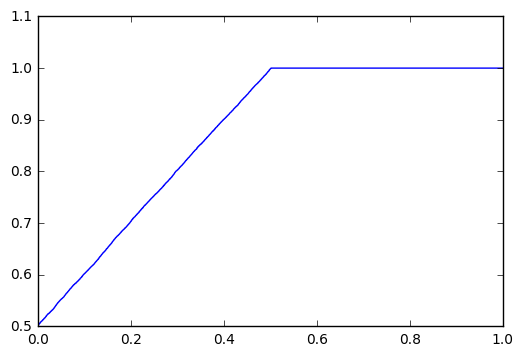

In [5]:
if __name__ == "__main__":
    num = 100000
    test_cut = np.asarray(int((num*0.))*[True] + int((num*.25))*[False])
    test_gt = np.random.randint(0,2,num)
    test_pred = np.concatenate((np.random.random(num/2) , test_gt[num/2:]))
    test_w = 1000*np.random.random(num)
    
    

if __name__ == "__main__":
    ws = [test_w]
    preds = [test_pred, test_cut]
    gt = test_gt
    weights = test_w

    pred = test_pred
    print(ams(pred,gt, weights, 0.05))
    print(bg_rej_sig_eff(pred,gt,weights))
    
    print(sig_eff_at(0.9996, pred,gt,weights))
    d= roc_vals(pred, gt, weights)
            
            

    from matplotlib import pyplot as plt

    %matplotlib inline

    plt.plot(d["fpr"], d["tpr"])

